### Machine Failure Prediction

##### Objective:
* The goal of this project is to predict machine failures based on sensor readings and operational settings.
* Predicting potential failures in advance helps reduce maintenance costs, downtime, and improves overall production efficiency.


Machines in manufacturing plants often fail unexpectedly, causing production delays and additional costs.
By analyzing real-time data from sensors such as temperature, torque, and rotational speed, we can build a predictive model that classifies whether a machine will fail or not in the near future.
This enables:

* Preventive maintenance instead of reactive repair
* Cost and downtime reduction
* Improved equipment reliability


##### Step 1. Data Gathering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
path = r"C:\Users\Admin\Downloads\classification-train-dataset.csv"
df = pd.read_csv(path)
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df['Machine failure'].unique()

array([0, 1])

In [4]:
df['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [5]:
(df['Machine failure'].value_counts()/len(df))*100

Machine failure
0    98.425555
1     1.574445
Name: count, dtype: float64

#### Step 2: Perform the basic data quality checks

In [6]:
df.shape

(136429, 14)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  str    
 2   Type                     136429 non-null  str    
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: float64(3), 

In [8]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='str')

In [9]:
df['Temperature Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature Difference
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,9.0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,9.5
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,9.2
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,9.9
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,11.0


In [10]:
# check for duplicated information
df.duplicated().sum()

np.int64(0)

In [11]:
# drop the duplciates
df=df.drop_duplicates()

In [12]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Temperature Difference     0
dtype: int64

### Separate X and Y features

* X= Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min] , Temperature Difference
* Y= Machine failure

In [40]:
X = df.drop(columns=['id','Product ID','Machine failure','TWF','HDF','PWF','OSF','RNF'])
Y = df[['Machine failure']]

In [41]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature Difference
0,L,300.6,309.6,1596,36.1,140,9.0
1,M,302.6,312.1,1759,29.1,200,9.5
2,L,299.3,308.5,1805,26.5,25,9.2
3,L,301.0,310.9,1524,44.3,197,9.9
4,M,298.0,309.0,1641,35.4,34,11.0


In [42]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Data Cleaning and Data Preprocessing

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

cat = list(X.select_dtypes(include='str').columns)
con = list(X.select_dtypes(include='number').columns)

num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform='pandas')

X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__Temperature Difference
0,0.0,1.0,0.0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-1.094793
1,0.0,0.0,1.0,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.587143
2,0.0,1.0,0.0,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.891733
3,0.0,1.0,0.0,0.610675,0.692284,0.026445,0.464745,1.447532,-0.181023
4,0.0,0.0,1.0,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0.935808


In [51]:

# Train-test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, train_size=0.66, stratify=Y, random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(90043, 9)
(46386, 9)
(90043, 1)
(46386, 1)


##### SMOTE : Increasing the samples of minority class

In [58]:
ytrain['Machine failure'].value_counts()

Machine failure
0    88625
1     1418
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
x_sample1, y_sample1 =smote.fit_resample(xtrain,ytrain)

In [60]:
y_sample1['Machine failure'].value_counts()

Machine failure
0    88625
1    88625
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

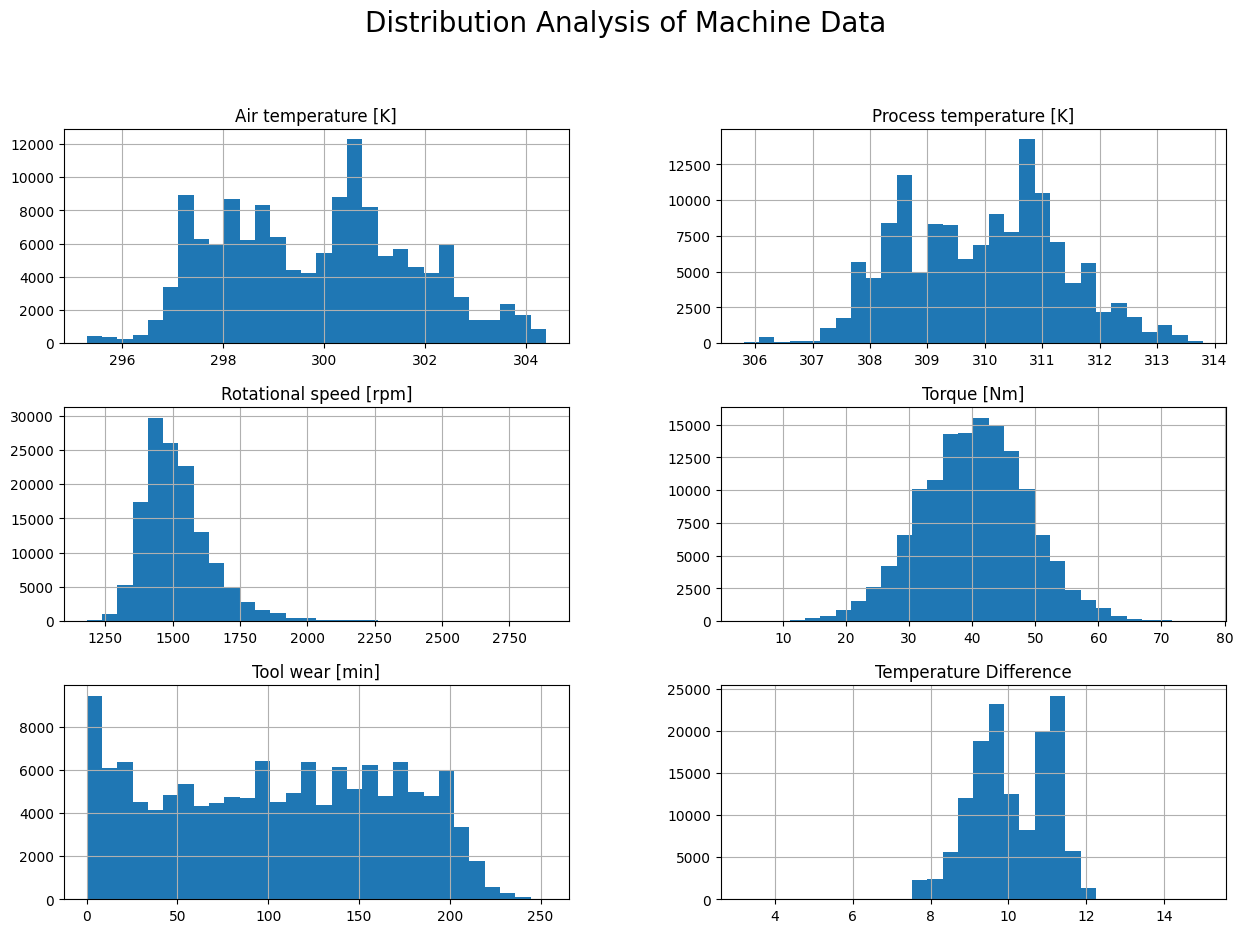

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
num_features = ['Air temperature [K]', 'Process temperature [K]', 
                'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
                'Temperature Difference']

X[num_features].hist(bins=30, figsize=(15,10))
plt.suptitle('Distribution Analysis of Machine Data', fontsize=20, y=1)

plt.show()


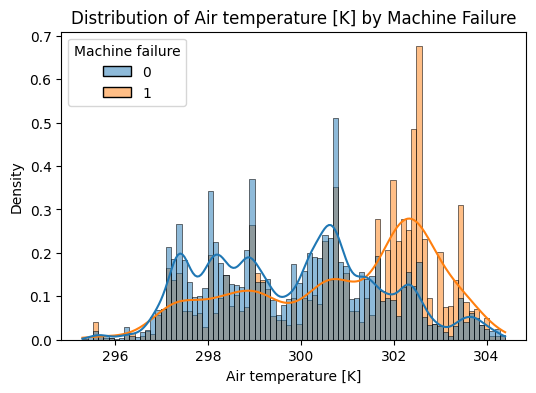

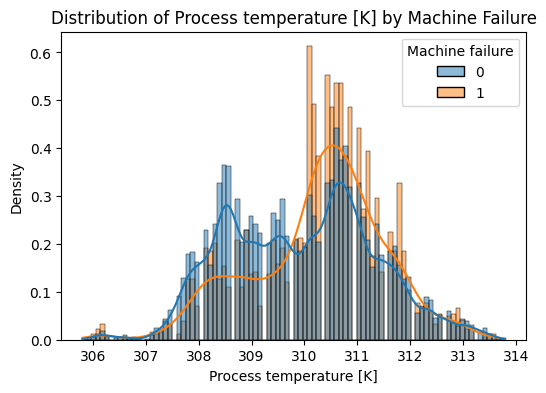

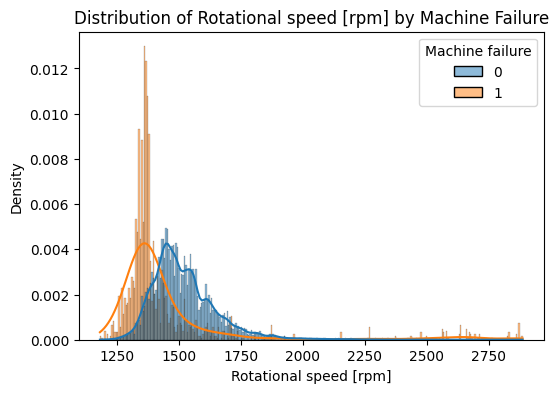

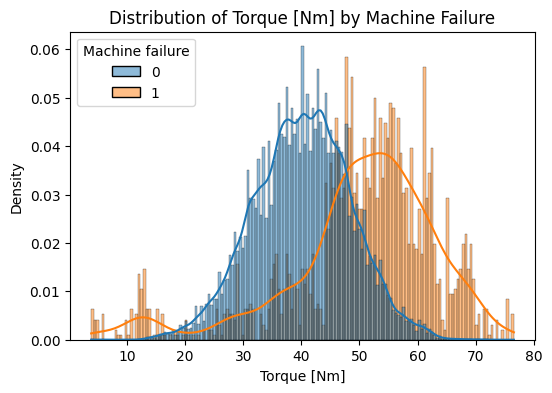

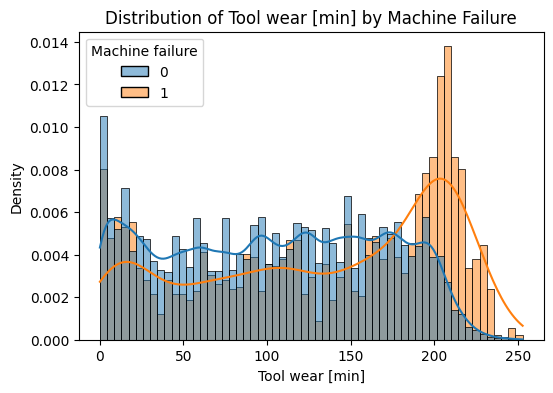

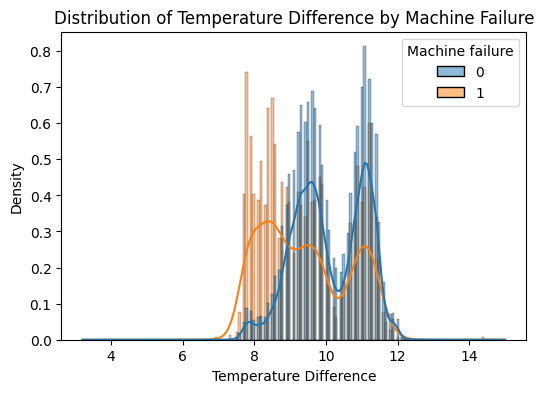

In [81]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Machine failure', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {col} by Machine Failure')
    plt.show()


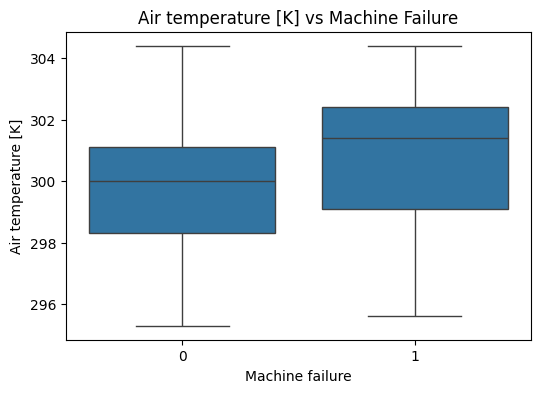

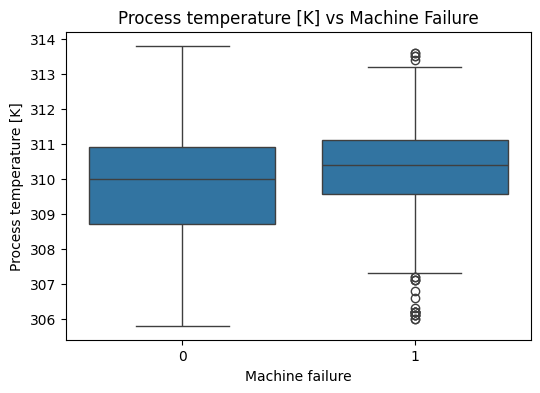

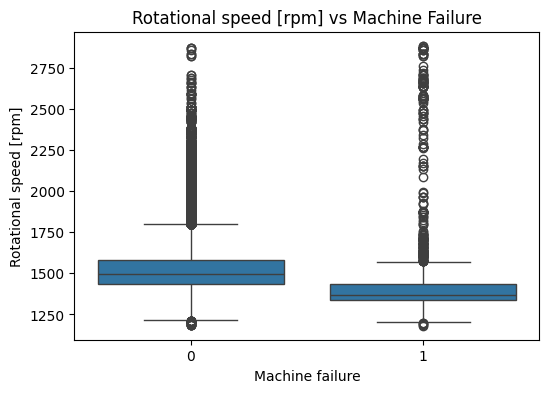

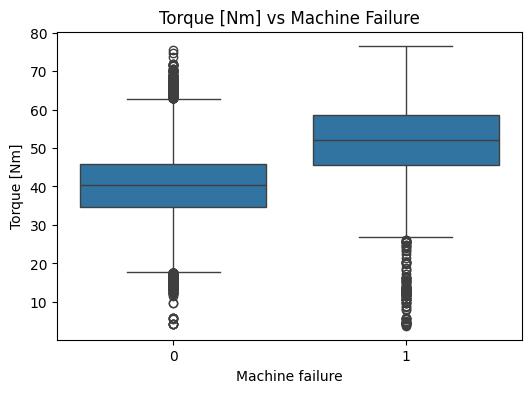

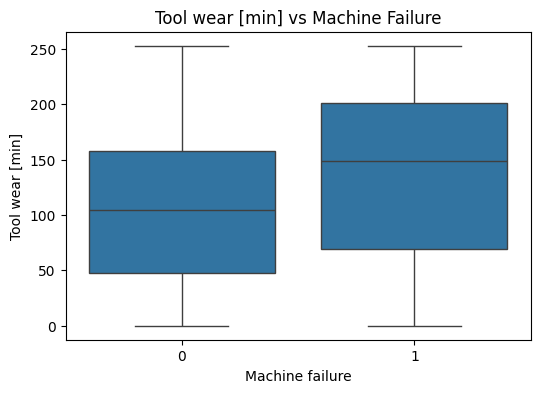

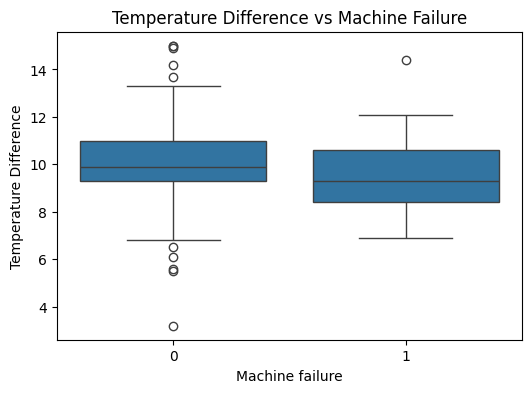

In [82]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Machine failure', y=col)
    plt.title(f'{col} vs Machine Failure')
    plt.show()


### Model Building